## **Context**

We are given a small medical dataset with some categorical and numerical variables to determinate the possible charges a beneficiary could have depending his/her condition.
We need to create a machine learning model using linear regression techniques to predict the numerical value (I will upload another program soon with random forest regression to we can see the difference)

**dataset link:** https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

## **Data Description**

- **age:** age of primary beneficiary
- **sex:** insurance contractor gender, female, male
- **bmi:** Body mass index.
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges:** Individual medical costs billed by health insurance

### Importing general libraries

In [1]:
# data manipulation libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

**IMPORTING DATASET**

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**CHECKING FOR COLUMNS TYPES AND MISSING VALUES**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observations:**
- There are 1,338 observations and 7 different features (columns)
- There are not missing values in our dataset
-  Each of the columns have it's corresponding type

As there are not missing values and the columns have the correct type, we can proceed to EDA and visualization to optain other insights of our data.

### **EDA and VISUALIZATION**

In [5]:
# Inferential statistic based on numeric columns values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Observations:**
- The average `age` is 39 years old, and the oldest client registered is 64 years old.
- Most of the clients only have one ``child or dependent`` and the case with more children/dependent is 5.
- The average ``BMI`` is above the normal average `18.5 - 24.9`. 

In [6]:
# percentage of male and female clients
df['sex'].value_counts(normalize=True)*100

male      50.523169
female    49.476831
Name: sex, dtype: float64

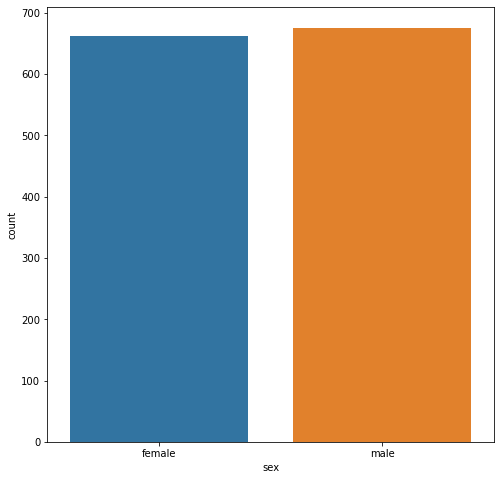

In [7]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'sex', data = df)
plt.show()

**Observations:**
- The distribution of both female and male clients is almost symetric with a little more males than females.

In [8]:
# Smoker percentage between the clients
df['smoker'].value_counts(normalize=True)*100

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

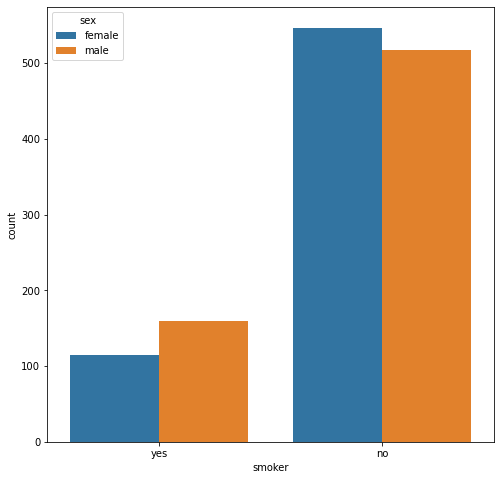

In [9]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'smoker', data = df, hue = 'sex')
plt.show()

**Observations:**
- Most of the clients are **non-smokers** with a greater number of female fitting into this category.
- The clients that do smoke are mostly men.

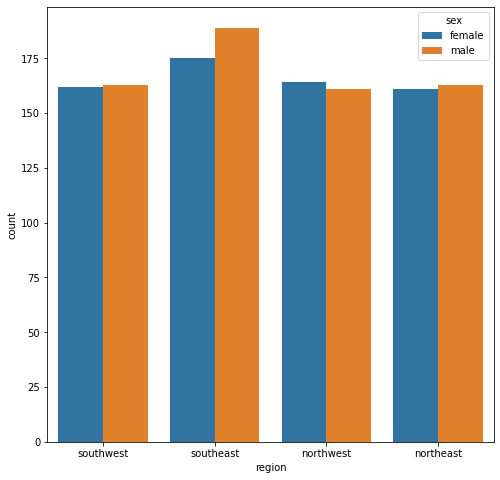

In [10]:
# number of clients per region
plt.figure(figsize = (8,8))
sns.countplot(x = 'region', data = df, hue = 'sex')
plt.show()

**Observations:**
- The distribution of the clients by `region` is good, as we can notice on the graph above.
- The region with more clients is the ``southeast`` region with more male than female.
- The only ``region`` where female are predominant is the ``northwest`` region.

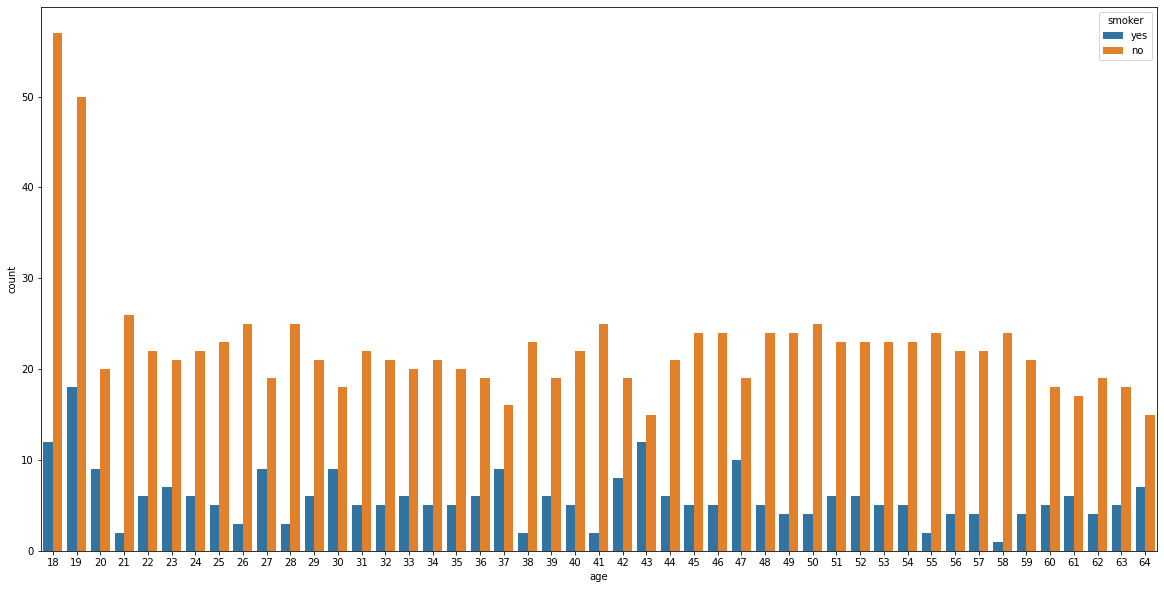

In [11]:
# smokers depending on the age of the client
plt.figure(figsize = (20,10))
sns.countplot(x = 'age', data = df, hue = 'smoker')
plt.show()

**Observations:**
- There is not a define pattern for smoker and age but we can see that the younger people has a higher number of no smoker but are also the highest number of smokers.

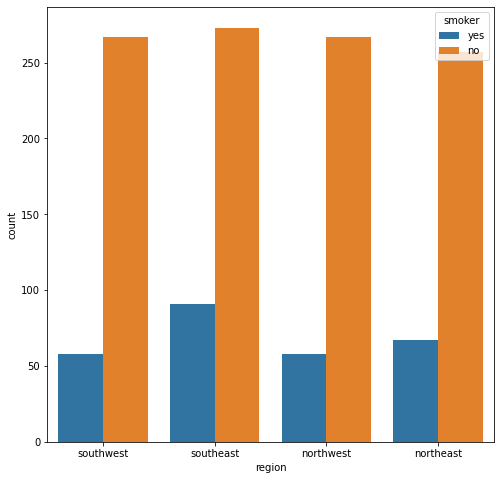

In [12]:
# smokers by region
plt.figure(figsize = (8,8))
sns.countplot(x = 'region', data = df, hue = 'smoker')
plt.show()

**Observations:**
- The region with the highest number of smokers is the ``southest`` region which is also the region with the greater concentration of clients.

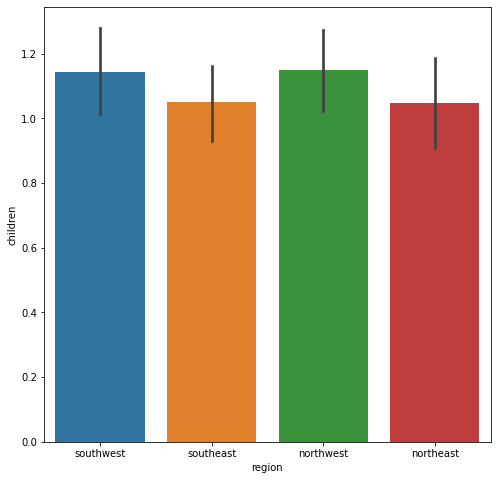

In [13]:
# number of children or dependents by region
plt.figure(figsize = (8,8))
sns.barplot(x = 'region', y = 'children', data = df)
plt.show()

**Observations:**
- The ``regions`` with the greaters number of children are the ``southwest`` and ``northwest`` regions.

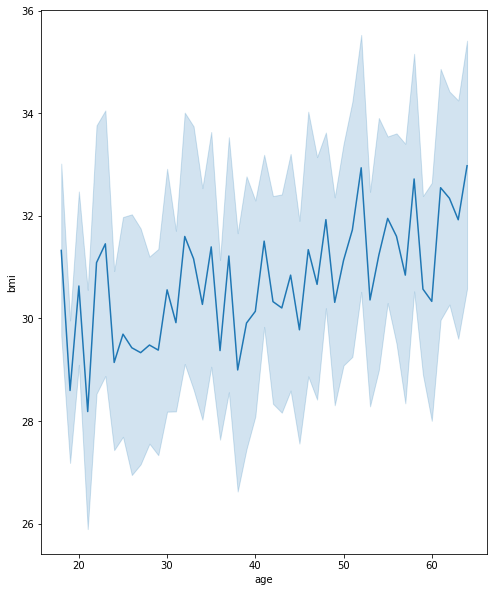

In [14]:
# relation of the age with teh bmi of a person
plt.figure(figsize = (8,10))
sns.lineplot(x = 'age', y = 'bmi', data = df)
plt.show()

**Observations:**
- The relation between the age and the bmi is not constant, but we can notice a trend of the ``bmi`` increase with the increase of the ``age``.

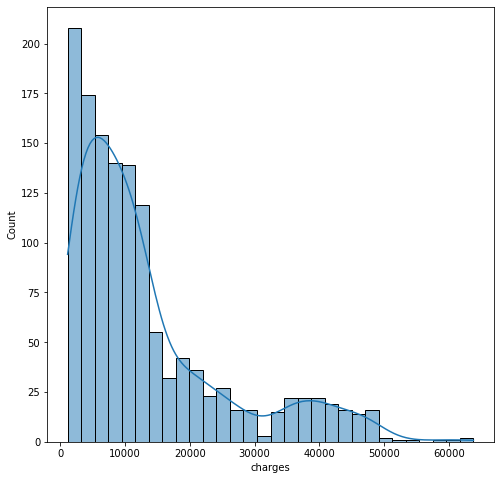

In [15]:
# checking the distribution of the target variable
plt.figure(figsize = (8,8))
sns.histplot(data = df, x = 'charges', kde = True)
plt.show()

**Observations:**
- The target variable is righ-skewed, which means most of the values are low.

**Observations:**
- After we applied log-transformation we can see that the dependant variable/target variable now resemble more a normal distribution plot.

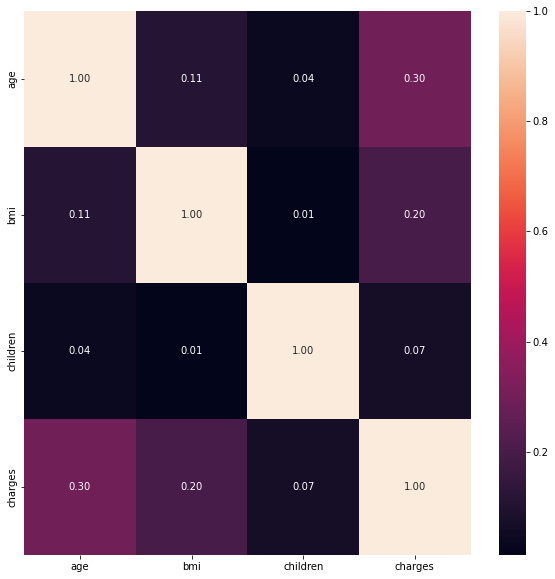

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f' )
plt.show()

**Observations**
- Between the numerical variables there are not high correlation with the target variable ``charges``
- The ``age`` have a 30% positive correlation with the ``charges``.
- The ``bmi`` have a 20% positive correlation with the ``charges``.

## **Preparing data for modelig**

**IMPORTING LIBRARIES FOR MODELING**

In [17]:
# library for linear visualization
from statsmodels.graphics.gofplots import ProbPlot

# Importing libraries to build linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# importing library to seprate data
from sklearn.model_selection import train_test_split

# importing library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

In [18]:
# independant variabl
X = df.drop(columns = 'charges')

# dependant variable/target
Y = df['charges']

In [19]:
# creating dummy variables from the train_feature
X = pd.get_dummies(X, drop_first = True)
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [174]:
train_features, test_features, train_target, test_target = train_test_split(X, Y, 
                                                                           test_size = 0.20,
                                                                            random_state = 1)

**STANDARIZING THE TRAINING DATA**

In [175]:
# creating an instance of the MinMaxScler
scaler = MinMaxScaler()

# applying fit transform on the trainin features
train_features_scaled = scaler.fit_transform(train_features)

# the above scaler returns the data in array format, below we are converting back to pandas dataframe
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index,
                                    columns = train_features.columns)
train_features_scaled.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
216,0.760870,0.286252,0.0,0.0,0.0,1.0,0.0,0.0
731,0.760870,0.146355,0.2,1.0,0.0,0.0,0.0,1.0
866,0.000000,0.573850,0.0,1.0,0.0,0.0,1.0,0.0
202,0.913043,0.217245,0.0,0.0,0.0,1.0,0.0,0.0
820,0.586957,0.477267,0.2,1.0,0.0,0.0,0.0,1.0


**STANDARIZING THE TEST DATA**

In [176]:
# creating an instance of the MinMaxScler
scaler2 = MinMaxScaler()

# applying fit transform on the trainin features
test_features_scaled = scaler2.fit_transform(test_features)

# the above scaler returns the data in array format, below we are converting back to pandas dataframe
test_features_scaled = pd.DataFrame(test_features_scaled, index = test_features.index,
                                    columns = test_features.columns)
test_features_scaled.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
559,0.021739,0.609510,0.0,1.0,0.0,1.0,0.0,0.0
1087,0.847826,0.479564,0.0,1.0,0.0,1.0,0.0,0.0
1020,0.717391,0.657385,0.0,1.0,0.0,0.0,0.0,1.0
460,0.673913,0.645335,0.6,0.0,0.0,0.0,1.0,0.0
802,0.065217,0.178635,0.2,1.0,0.0,0.0,0.0,1.0


### **BUILDING THE MODEL**
Now as the dataset is ready and prepared, we are set to build the model using `statsmodels` package

In [177]:
# here we are adding the intercept term
train_features_scaled = sm.add_constant(train_features_scaled)

# calling the OLS algorithm on the train features and target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled)

# fitting the model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     393.2
Date:                Fri, 01 Jul 2022   Prob (F-statistic):          4.76e-311
Time:                        21:35:33   Log-Likelihood:                -10838.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1061   BIC:                         2.174e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1529.7002    653.538  

- We can see that `R-squared` for the model is `0.748`. 
- Not all the variables are statistically significant to predict the outcome variable. To check which are statistically significant or have predictive power to predict the target variable, we need to check the `p-value` against all the independent variables.
- Four variables have p-values greater than 0.05 `sex_male`, `region_northwest`, `region_southeast` and `region_southwest`

## **Feature Selection**

### **Removing Multicollinearity**

In [178]:
vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled.values, i) for i in range(train_features_scaled.shape[1])],
    index=train_features_scaled.columns,
    dtype=float,
)
print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const               12.318395
age                  1.016964
bmi                  1.104196
children             1.006832
sex_male             1.007974
smoker_yes           1.008937
region_northwest     1.511616
region_southeast     1.631034
region_southwest     1.530394
dtype: float64



**Observations:**
- The features have a VIF score of 1 which means none of them have a correlation kth predicator, hence the variance is not inflated.

In [179]:
train_features_scaled_new = train_features_scaled.drop(["sex_male", "region_northwest", "region_southwest"], axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new.values, i) for i in range(train_features_scaled_new.shape[1])],
    index=train_features_scaled_new.columns,
    dtype=float,
)
print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const               9.405205
age                 1.016750
bmi                 1.089684
children            1.002228
smoker_yes          1.003046
region_southeast    1.078863
dtype: float64



In [180]:
# calling the OLS algorithm on the train features and target variable
ols_model_1 = sm.OLS(train_target, train_features_scaled_new)
# fitting the model
ols_res_1 = ols_model_1.fit()

print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     628.3
Date:                Fri, 01 Jul 2022   Prob (F-statistic):          1.76e-314
Time:                        21:35:37   Log-Likelihood:                -10840.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1064   BIC:                         2.172e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1982.0003    571.129  

In [181]:
train_features_scaled_new2 = train_features_scaled_new.drop(["region_southeast"], axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new2.values, i) for i in range(train_features_scaled_new2.shape[1])],
    index=train_features_scaled_new2.columns,
    dtype=float,
)
print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const         9.403832
age           1.014636
bmi           1.013911
children      1.000932
smoker_yes    1.000669
dtype: float64



In [182]:
# calling the OLS algorithm on the train features and target variable
ols_model_2 = sm.OLS(train_target, train_features_scaled_new2)
# fitting the model
ols_res_2 = ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     784.3
Date:                Fri, 01 Jul 2022   Prob (F-statistic):          1.44e-315
Time:                        21:35:39   Log-Likelihood:                -10841.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1065   BIC:                         2.172e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1991.2198    571.297     -3.485      0.0

**Observations:**
- All the VIF scores are lower than 5 indicating no multicolinearity.
- All the p-value are less than 0.05 so we are good to go.
- We can notice that the R-squared didn't change, which indicates that the feature we removed `sex_male`, `region_northwest`, ``regon_southwest`` and ``region_east`` were not adding any value to the model.

### **Mean of residuals should be 0**

In [183]:
residual = ols_res_2.resid
residual.mean()

-3.2741809263825417e-12

**Observations:**
- The residual value is so small that can be considered 0, so we are good to go.

### **Linearity of Variables**

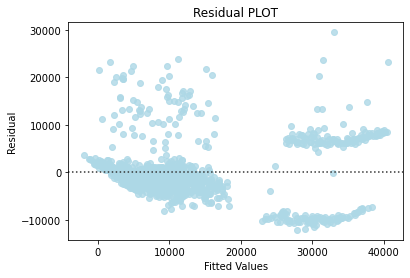

In [184]:
# predicted values
fitted = ols_res_2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residual, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

In [185]:
#Log transformation on the target variable
train_target_log = np.log(train_target)

In [186]:
#Fitting new model with the transformed target variable
ols_model_3 = sm.OLS(train_target_log, train_features_scaled_new2)
ols_res_3 = ols_model_3.fit()

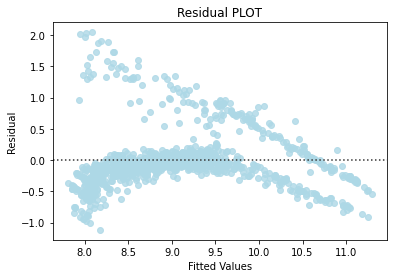

In [187]:
# predicted values
fitted2 = ols_res_3.fittedvalues
residual1 = ols_res_3.resid

# sns.set_style("whitegrid")
sns.residplot(x = fitted2, y = residual1, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

### **Evaluation Metrics**

#### **R-Squared**

The R-squared metric gives us an indication that how good/bad our model is from a baseline model

In [188]:
print(ols_res_3.rsquared)

0.7565997559781719


#### **Mean Squared Error**

This metric measures the average of the squares of the errors i.e. the average squared difference between the estimated values and the actual value.

In [189]:
print(ols_res_3.mse_resid)

0.2042920830361437


#### **Root Mean Squared Error**

This metric is same as the above but instead of square root of MSE to get RMSE

In [190]:
print(np.sqrt(ols_res_3.mse_resid))

0.45198681732562035


In [191]:
print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     827.6
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:35:53   Log-Likelihood:                -666.07
No. Observations:                1070   AIC:                             1342.
Df Residuals:                    1065   BIC:                             1367.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8039      0.042    184.173      0.0

**Observations:**
- Our model performance have improve a little, from `747` to `757` R-squared

### **Cross Validation**

Below we are checking the cross validation score to identify if the model that we have built is `underfitted`, `overfitted` or `just right` model.

In [192]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, train_features_scaled_new2, train_target_log, cv = 10)
cv_Score12 = cross_val_score(linearregression, train_features_scaled_new2, train_target_log, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.751 (+/- 0.133)
Mean Squared Error: 0.206 (+/- 0.124)


**Observations:**
- The R-Squared on the cross validation is `0.751` which is almost similar to the R-Squared on the training dataset which is `757`.
- And the MSE on cross validation is `0.206` which is almost similar to the MSE on the training dataset which is `204`.

## **Predictions on the Test Dataset**

In [194]:
test_features_scaled = test_features_scaled.drop(columns = ['sex_male','region_northwest', 'region_southwest', 
                                                           'region_southeast'])
test_features_scaled = sm.add_constant(test_features_scaled)
test_features_scaled.head()

,const,age,bmi,children,smoker_yes
559,1.0,0.021739,0.609510,0.0,0.0
1087,1.0,0.847826,0.479564,0.0,0.0
1020,1.0,0.717391,0.657385,0.0,0.0
460,1.0,0.673913,0.645335,0.6,0.0
802,1.0,0.065217,0.178635,0.2,0.0


In [195]:
test_predictions = ols_res_3.predict(test_features_scaled)

# we are converting the log scale predictions to its original scale
test_predictions_inverse_transformed = np.exp(test_predictions)
test_predictions_inverse_transformed

559      3184.356845
1087    11191.552037
1020     9732.565277
460     12108.971925
802      3200.113570
            ...     
682     35869.401243
629     36657.587925
893     49353.828449
807      3225.110545
1165     4920.782121
Length: 268, dtype: float64

Point to remember: The output of this model is in log scale. So after prediction we need to transform this value in log back to its original scale by doing inverse of log transformation i.e. taking exponentiation</font>

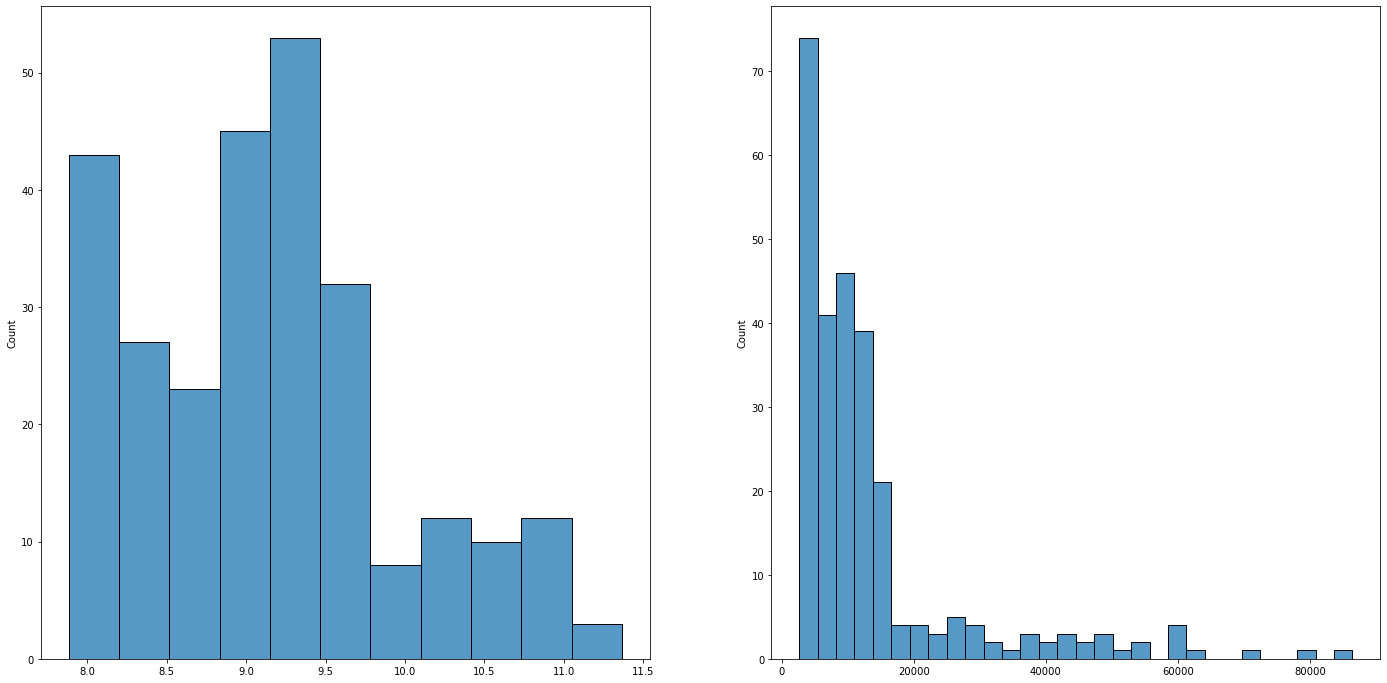

In [196]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

sns.histplot(test_predictions, ax=ax[0]);
sns.histplot(test_predictions_inverse_transformed, ax=ax[1]);

## **Conclusions**

- We performed EDA - univariate and bivariate analysis on all the variables in the dataset
- We started the model building the process with all the features
- We analyzed the model summary report
- Then we evaluated the model using different evaluation metrics

As we noticed not all the features given to us helped the our model, we started with 7 different features and ended up with 5 main features that actually influenced our predictions.
Note: it is wise to deal with large amount of data when training our models, as the more data we use to train the more precise,accurate and complete our model will be, if we try our current model without the test data you will notice that the features we need to drop are less.